# Ford car price prediction model using simple linear regression

> #### Dataset - https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [27]:
# importing dataset as dataframe in Pandas
ford_df = pd.read_csv("ford.csv")

In [28]:
# first 5 rows from the dataframe
ford_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [29]:
# summary of the numerical columns in dataframe
ford_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [30]:
# summary of the dataframe, datatype of columns, memory used by the dataframe
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [31]:
# checking for null values in each column
ford_df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

> ### Encoding categorical variables using one hot encoding

In [32]:
# splitting original dataframe into 2, one with numeric features and other with categorical features
df_numeric = ford_df[['year','price','mileage','mpg','engineSize']]
df_categorical = ford_df[['model','transmission','fuelType']]
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_encoded.head()

,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,model_ Focus,model_ Fusion,model_ Galaxy,model_ Grand C-MAX,model_ Grand Tourneo Connect,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
ford_df_new = pd.concat([df_numeric, df_categorical_encoded], axis=1)
ford_df_new.head()

,year,price,mileage,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,57.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460,40.3,1.5,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482,48.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


> ### Splitting dataset into training set and test set

In [42]:
X = ford_df_new.drop('price',axis=1)
y = ford_df_new['price']
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=100, 
                                   test_size=0.20, 
                                   shuffle=True)

In [72]:
# number of data points in train and test set
print(ford_df_new.shape)
print(X_train.shape)
print(y_test.shape)

(17966, 34)
(14372, 33)
(3594,)


> ### Linear regression on dataset

In [58]:
model = LinearRegression()
lr = model.fit(X_train,y_train)
print(lr.score(X_test,y_test))

0.8285004405717243


In [59]:
# printing out a data point from training set to create a similar data point for prediction
print(X_train.loc[0])
print("********************************************")
print(y_train.loc[0])

year                             2017.0
mileage                         15944.0
mpg                                57.7
engineSize                          1.0
model_ C-MAX                        0.0
model_ EcoSport                     0.0
model_ Edge                         0.0
model_ Escort                       0.0
model_ Fiesta                       1.0
model_ Focus                        0.0
model_ Fusion                       0.0
model_ Galaxy                       0.0
model_ Grand C-MAX                  0.0
model_ Grand Tourneo Connect        0.0
model_ KA                           0.0
model_ Ka+                          0.0
model_ Kuga                         0.0
model_ Mondeo                       0.0
model_ Mustang                      0.0
model_ Puma                         0.0
model_ Ranger                       0.0
model_ S-MAX                        0.0
model_ Streetka                     0.0
model_ Tourneo Connect              0.0
model_ Tourneo Custom               0.0


In [66]:
# creating a data point similar to one data point in the training set
# reference data - [[2017,15944,57,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
# reference price - 12000
test_data = [[2019,16000,55,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
lr.predict(np.array(test_data))

/home/keziya/anaconda3/envs/ford/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13400.15593814])

> ### Calculating coefficient of determination

In [65]:
# calculating coefficient of determination, r2 score
# an r2 score close to 1 indicates a good model
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.8285004405717243


> ### Visualizing numerical data using few datapoints from the dataset 

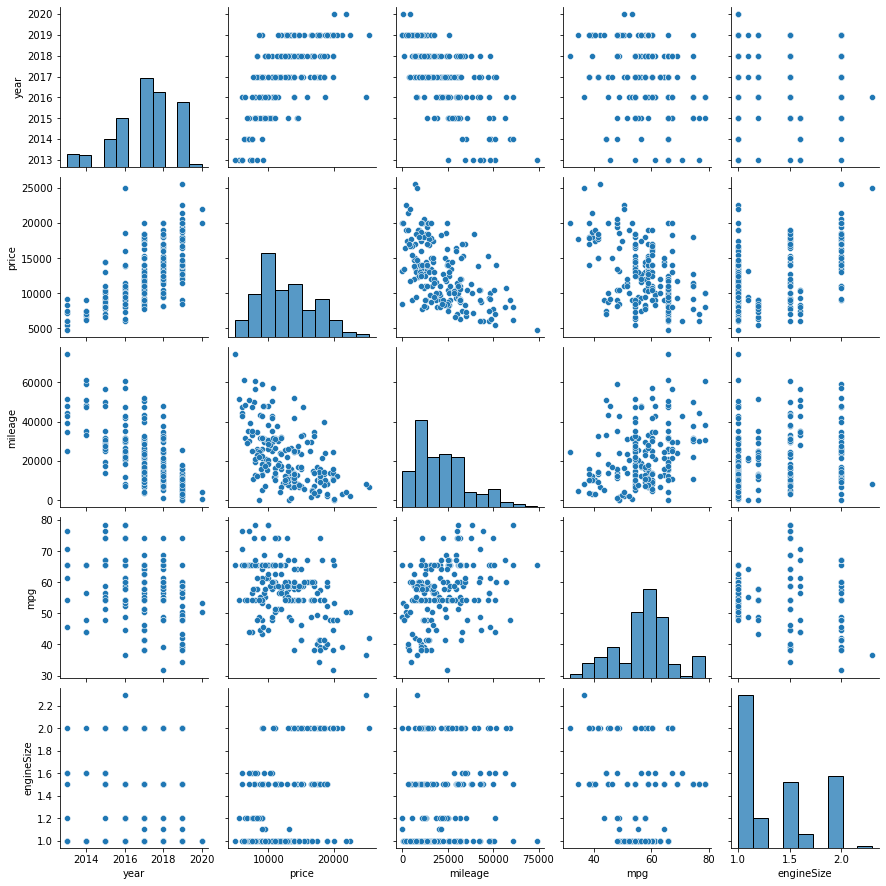

In [70]:
import seaborn as sns
sns.pairplot(df_numeric[:200])